In [ ]:
Dataset url : 

https://raw.githubusercontent.com/manishanker/stats_ml_jun2020/master/datasets_737503_1278636_heart.csv


Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack


Assignment:

1) Import Packages

2) EDA - Histograms, Pairplot, Countplot, correlation

3) Preparing ML models

4) Models evaluation - see which model works well. Logistic or Decision (careful with overfitting using Decision Trees)

5) Conclusion -  [Choose the model which has higher precision in finding people with Heart Disease]

## 1) Import packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manishanker/stats_ml_jun2020/master/datasets_737503_1278636_heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2) EDA - Histograms, Pairplot, Countplot, correlation

In [5]:
len(df.columns)

14

In [6]:
df['slope'].unique()

array([0, 2, 1])

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
import seaborn as sns

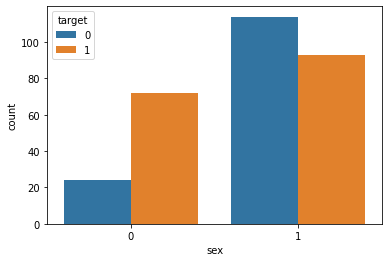

In [9]:
sns.countplot(df['sex'], hue = df['target'], data=df)

### Inference: Though number of females in the study are less than half of men, they have relatively more risk of having heart disease.

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

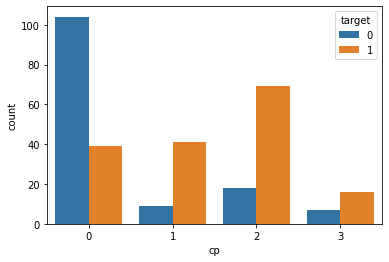

In [11]:
sns.countplot(df['cp'],hue = df['target'], data=df)

### Inference: Chest pain with type 2 are having highest risk of Heart Disease

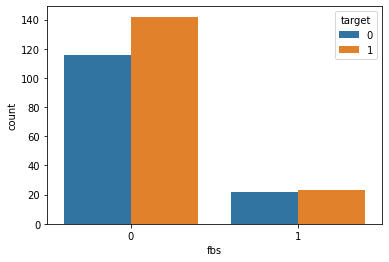

In [12]:
sns.countplot(df['fbs'],hue = df['target'], data=df)

### Inference: Subjects having fasting blood sugar > 120 mg/dl are equally likely to have Heart Disease

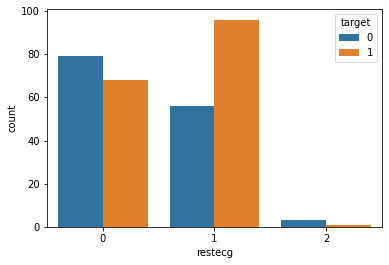

In [13]:
sns.countplot(df['restecg'],hue = df['target'], data=df)

### Inference:
### - Subjects with Resting ECG value as '0' are equally likely to have risk of having heart disease.
### - Subjects with Resting ECG value as '1' are having almost "twice" risk of having heart disease.
### - Very few subjects in the study have resting electrocardiographic value as '2'.

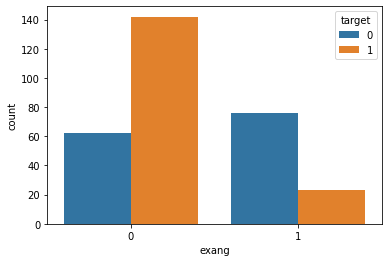

In [14]:
sns.countplot(df['exang'], hue='target', data=df)

### Inference: exercise induced angina can result is significant lower risk of heart disease 
###            where as no exercise induced angina can increase the risk of heart disease.

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <a list of 10 Patch objects>)

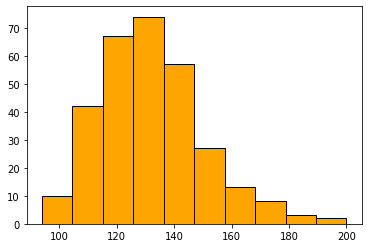

In [15]:
import matplotlib.pyplot as plt
plt.hist(df['trestbps'], color='orange', edgecolor='black')

### Inference: Maximum subjects under study has resting blood pressure between 110-150

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

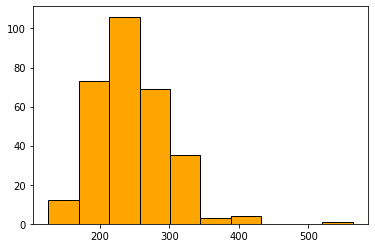

In [16]:
import matplotlib.pyplot as plt
plt.hist(df['chol'], color='orange', edgecolor='black')

### Inference: Maximum subjects under study has serum cholestoral between 150-300

In [17]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <a list of 10 Patch objects>)

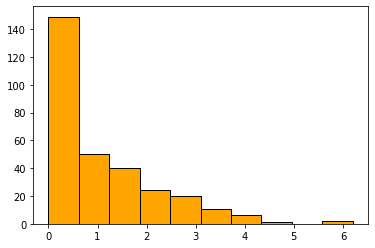

In [18]:
import matplotlib.pyplot as plt
plt.hist(df['oldpeak'], color='orange', edgecolor='black')

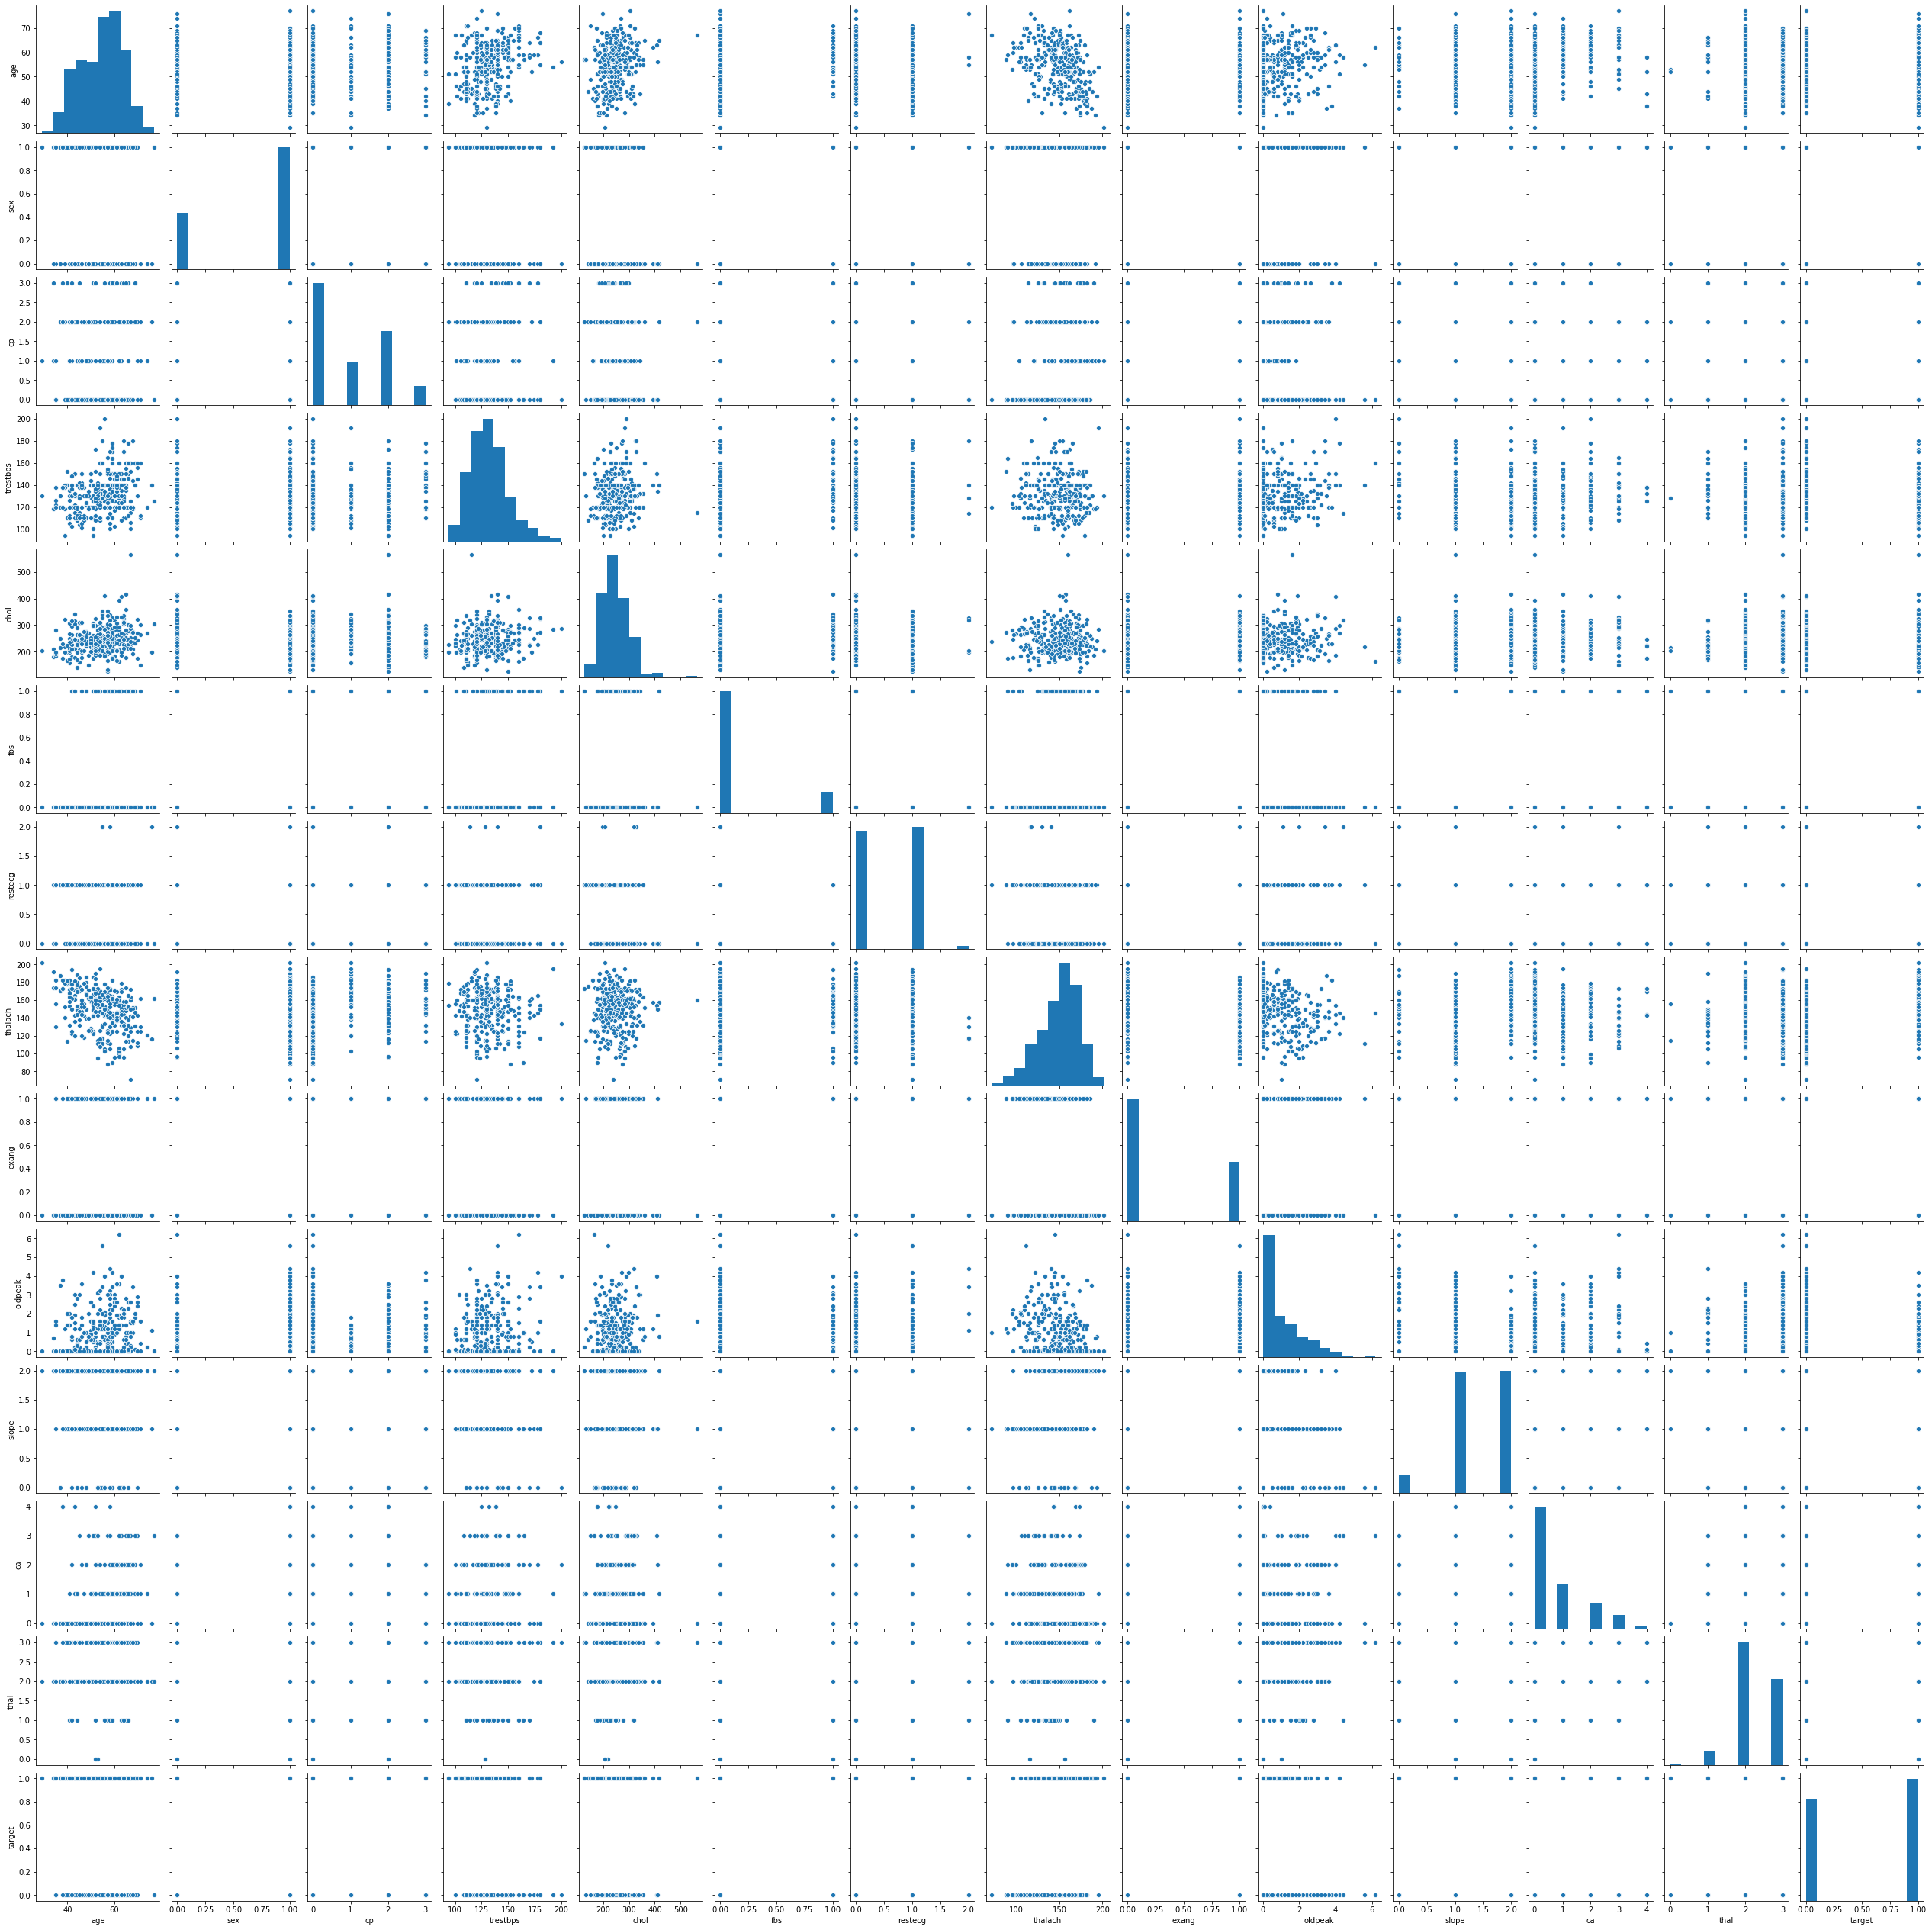

In [103]:
sns.pairplot(df)

In [20]:
pearson = df.corr(method='pearson')
pearson

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


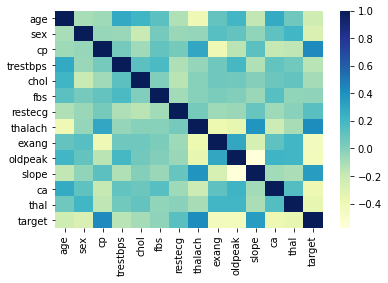

In [102]:
sns.heatmap(data=pearson,
            cmap="YlGnBu",
            xticklabels=df.columns,
            yticklabels=df.columns)

### Inference: Based on heatmap, 'target' has strong correlation with 'exang', 'oldpeak', 'ca', 'thal' features and medium correlation with 'age' and 'sex'.

## 3) Preparing ML models

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Dropping 'chol' and 'fbs' due to exremely low correlation with 'target'

In [105]:
#features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
features=['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

In [106]:
X = df[features]
y = df['target']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 4) Models evaluation

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Plotting Decision tree without defining 'Depth'

In [110]:
# Create objet of Decision Tree Classifier
model = DecisionTreeClassifier()

In [111]:
# Train Decision Tree Classifer
model.fit(X_train, y_train)

# Predicting train data score
y_pred_train = model.predict(X_train)

# Predicting test data score
y_pred = model.predict(X_test)

In [112]:
print('Accuracy score for Train data:', metrics.accuracy_score(y_train, y_pred_train)*100)
print('Accuracy score for Test data:', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score for Train data: 100.0
Accuracy score for Test data: 74.72527472527473


In [113]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        46
           1       0.74      0.76      0.75        45

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [115]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

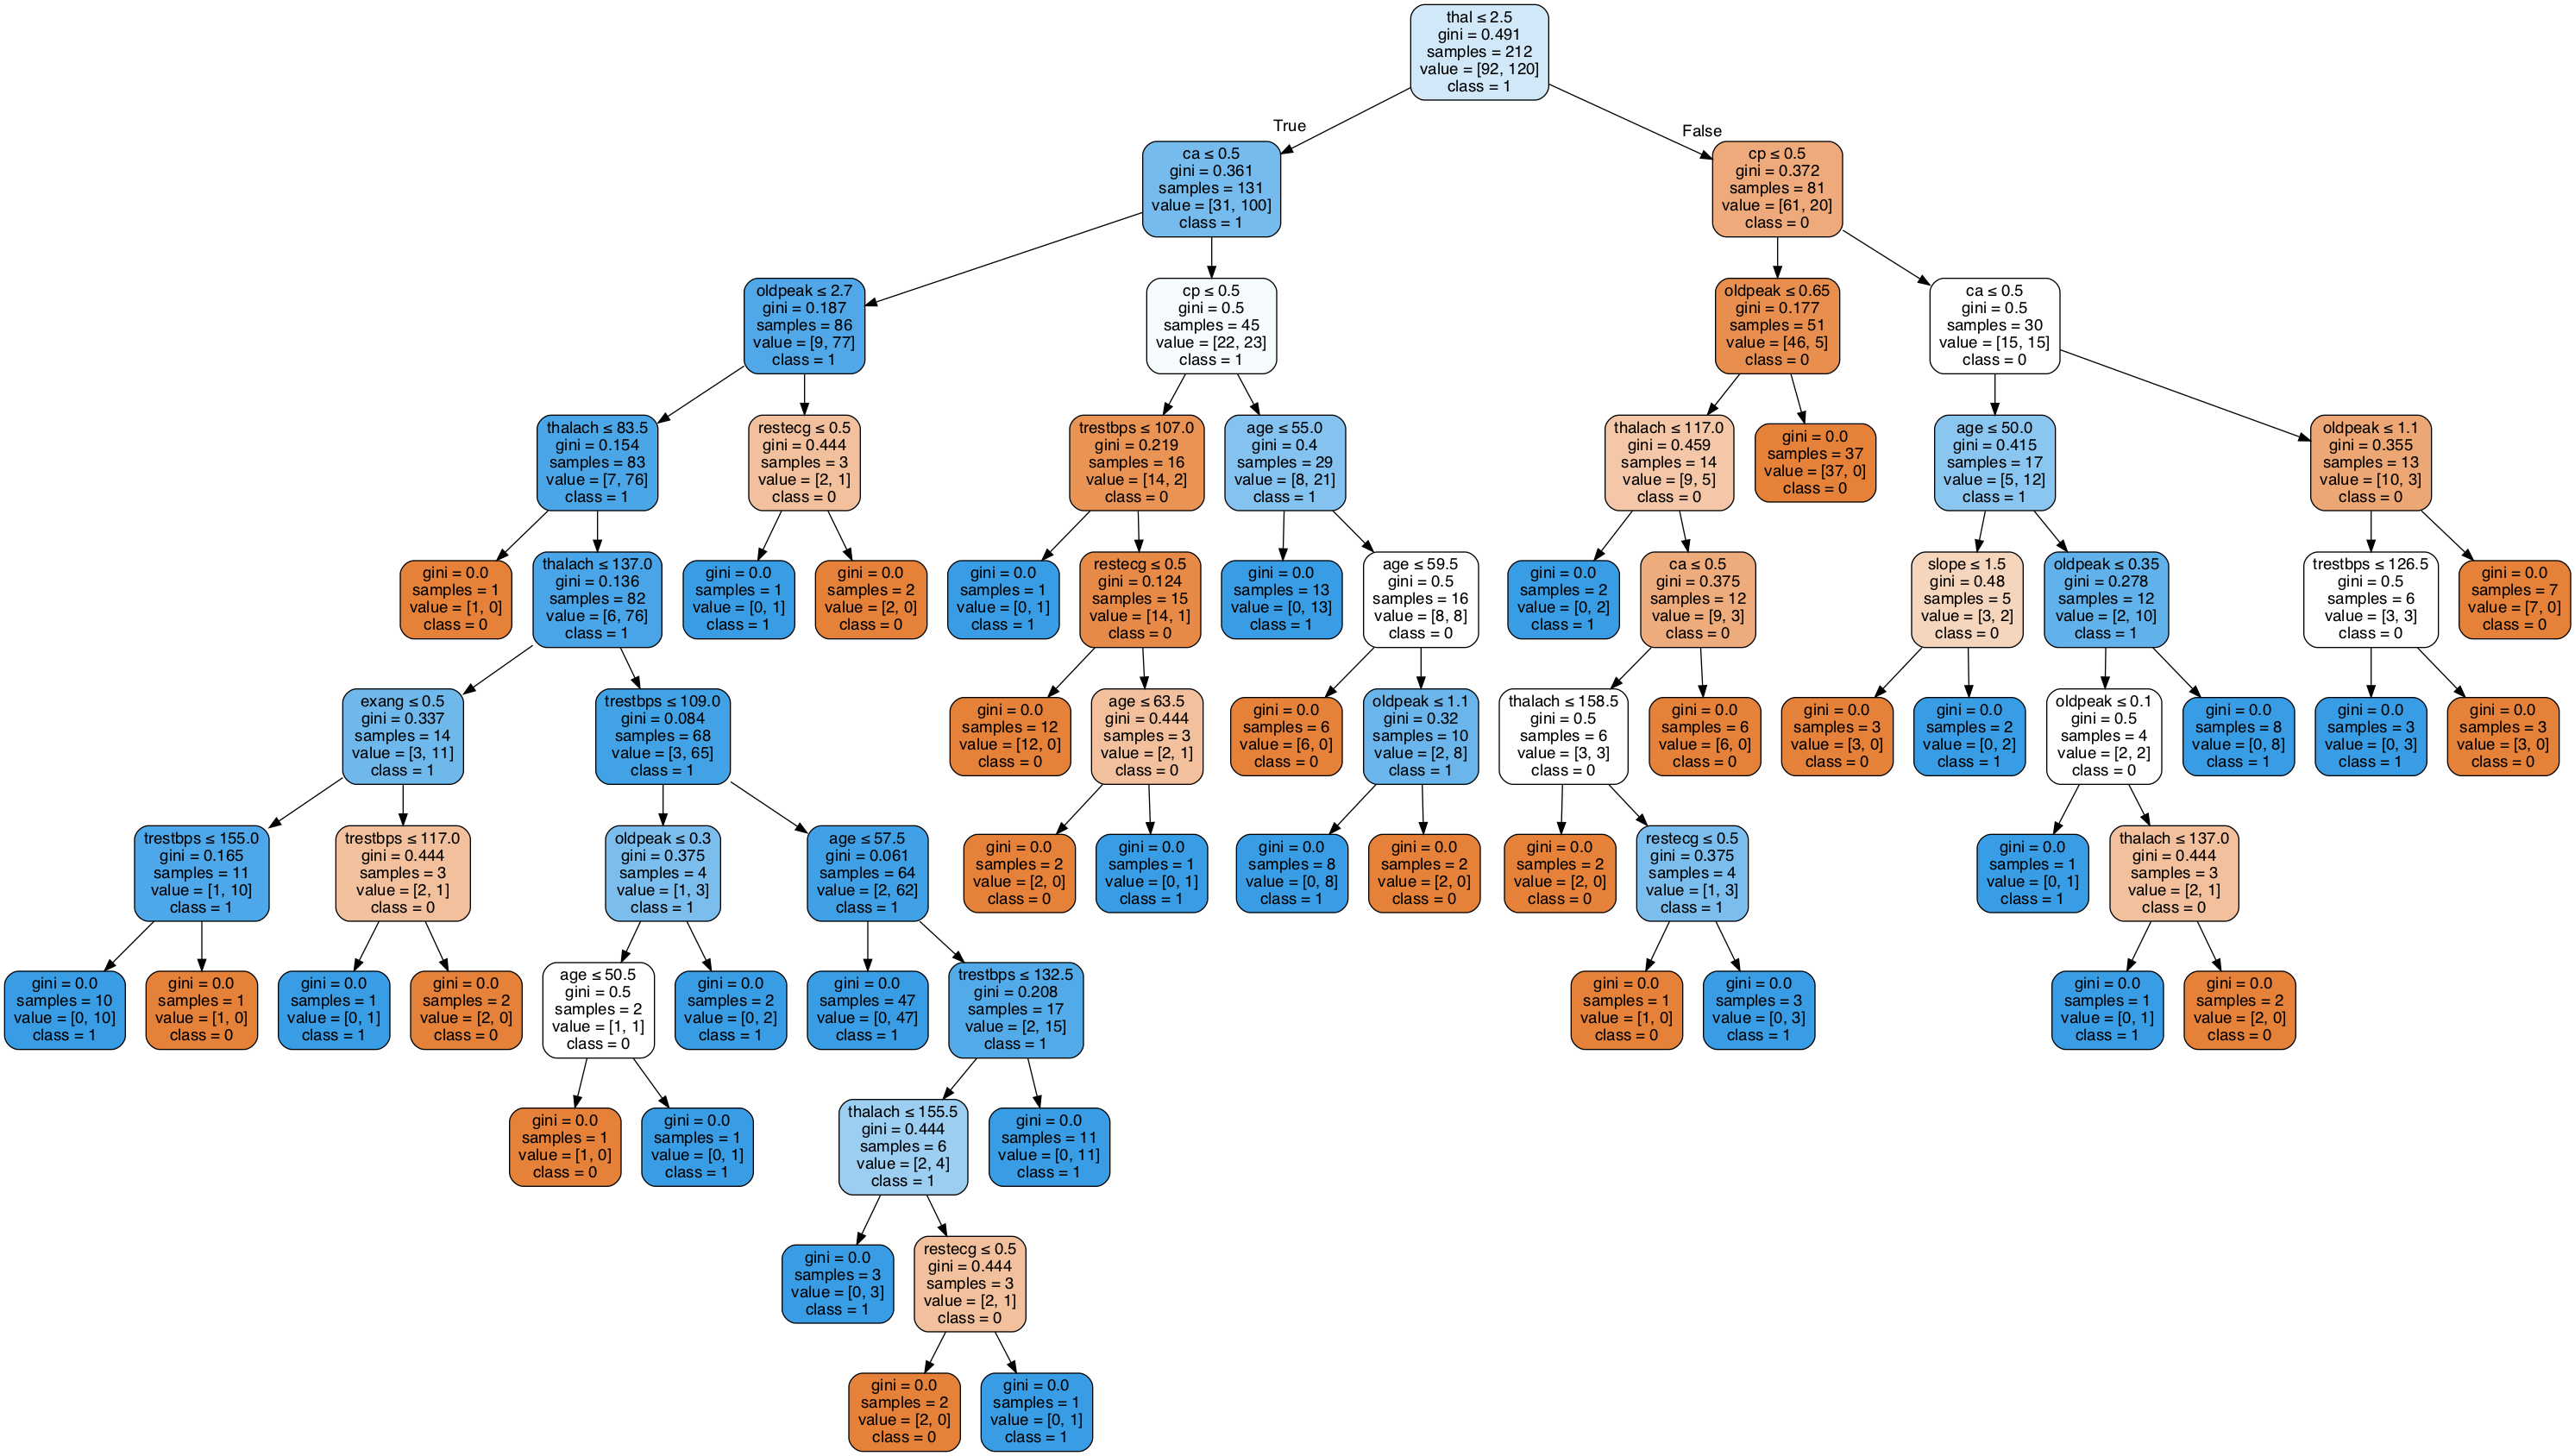

In [116]:
dot_data = StringIO()
export_graphviz(model,
               out_file=dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartdisease.png')
Image(graph.create_png())

### Plotting Decision tree with 'Depth'

In [117]:
# Create Decision Classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Fitting the data to model
clf.fit(X_train,y_train)

# Predict train dataset
y_pred_train1 = clf.predict(X_train)

# Predict test dataset
y_pred_test = clf.predict(X_test)

In [118]:
print('Accuracy score for Train data with depth :', metrics.accuracy_score(y_train, y_pred_train1)*100)
print('Accuracy score for Test data using Decision Tree with depth :', metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy score for Train data with depth : 86.32075471698113
Accuracy score for Test data using Decision Tree with depth : 79.12087912087912


In [119]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        46
           1       0.78      0.80      0.79        45

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



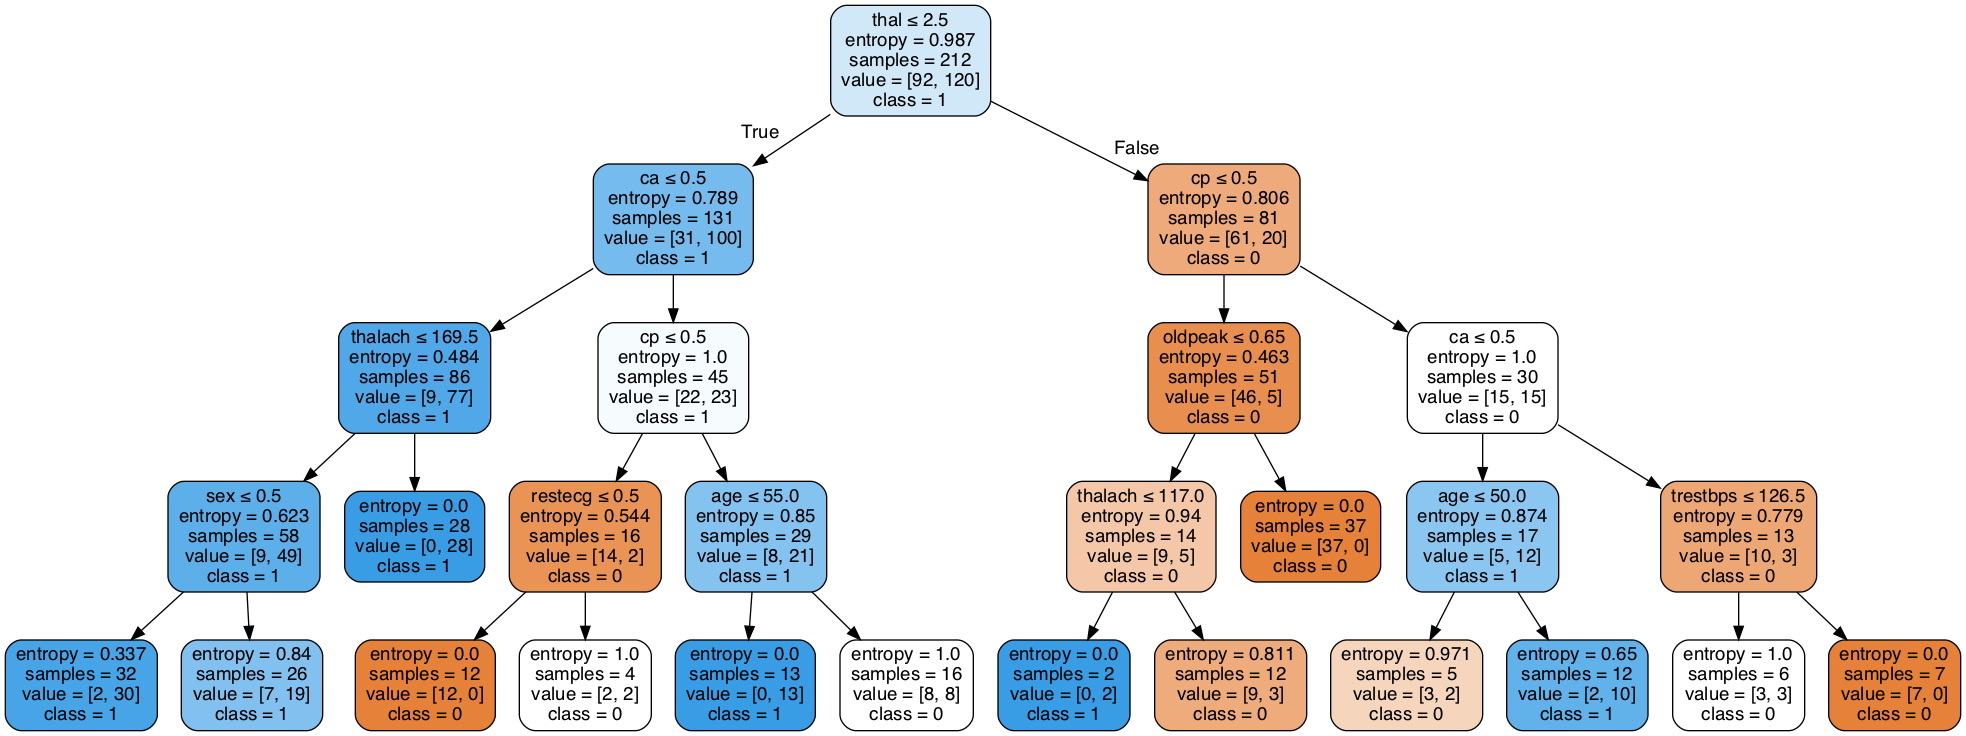

In [120]:
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartdisease2.png')
Image(graph.create_png())

## Using Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logreg = LogisticRegression(max_iter=1000)

#Fitting logistic regression model
logreg.fit(X_train, y_train)

#Predicting the test data
y_pred_test_lr = logreg.predict(X_test)

In [123]:
print('Accuracy score for Test data using Logistic Regression:', metrics.accuracy_score(y_test, y_pred_test_lr)*100)

Accuracy score for Test data using Logistic Regression: 85.71428571428571


In [124]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        46
           1       0.82      0.91      0.86        45

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



## 5) Conclusion:
### Based on the Classification report, Logistic Regression has higher precision for finding people with Heart disease than Decision Tree.

### Logistic Regression: 82%
### Decision Tree(depth=4): 78%

### Note: These are not the Accuracy scores but Precision scores.